In [17]:
import csv
from jinja2 import Template

In [41]:
def get_data():
  col_names = ['student_id', 'course_id', 'marks']
  data = list(csv.DictReader(open('data.csv'), fieldnames=col_names))
  data = data[1:]
  return data


# get_data()

In [19]:
def get_student_data(student_id):
  data = get_data()
  student_data = [row for row in data if row['student_id'] == student_id]
  if len(student_data) == 0:
    raise Exception('invalid student_id')
  marks = [int(row['marks']) for row in student_data]
  total_marks = sum(marks)
  return student_data, total_marks


# get_student_data('1001')

In [20]:
def get_course_data(course_id):
  data = get_data()
  course_data = [row for row in data if row['course_id'] == course_id]
  if len(course_data) == 0:
    raise Exception('invalid course_id')
  marks = [int(row['marks']) for row in course_data]
  avg_marks = sum(marks)/len(marks)
  max_marks = max(marks)
  return course_data, marks, avg_marks, max_marks


# get_course_data(' 2001')

In [21]:
def generate_error_output():
  markup = open('error_output.j2').read()
  open('output.html', 'w+').write(markup)

In [40]:
def generate_student_output(student_id):
  try:
    student_data, total_marks = get_student_data(student_id)
  except:
    return generate_error_output()
  template_string = open('student_output.j2').read()
  template = Template(template_string)
  markup = template.render(student_data=student_data, total_marks=total_marks)
  open('output.html', 'w+').write(markup)


generate_student_output('1004')

In [23]:
def generate_histogram(marks, course_id):
  import matplotlib.pyplot as plt
  plt.hist(marks)
  plt.title(f'Marks vs Frequency for Course ID: {course_id}')
  plt.xlabel('Marks')
  plt.ylabel('Frequency')
  plt.savefig('histogram.png')

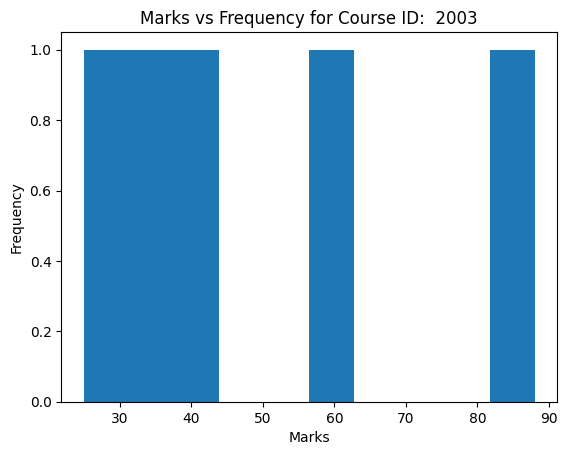

In [35]:
def generate_course_output(course_id):
  try:
    course_data, marks, avg_marks, max_marks = get_course_data(course_id)
  except:
    return generate_error_output()
  template_string = open('course_output.j2').read()
  template = Template(template_string)
  markup = template.render(avg_marks=avg_marks, max_marks=max_marks)
  open('output.html', 'w+').write(markup)
  generate_histogram(marks, course_id)


generate_course_output(' 2003')